# CMPT 423/820
## Assignment 4 Question 4
* Seyedeh Mina Mousavifar
* 11279515
* sem311

The ```a4q4.csv``` file contains a 6D dataset (each sample has 6 numeric features, one class label, and an index column).  It's too many dimensions to visualize directly.  

We'll try to visualize the data, and build a classifier from it.  Then we'll apply PCA, use the first two principle components for visualization and to train a classifier.  

To complete this question:
1. Produce a scatter plot of any 2 dimensions.  Do you see any natural clusters in 2D?
1. Build a classifier (your choice, e.g., Naive Bayes, KNN, etc) using the 6 features and the label.  Get an estimate of the classifier performance using cross validation.
1. Use Principle Component Analysis to reduce the data to 2 principle components.  (look at the docs: sklearn.decomposition.PCA)
1. Produce a scatter plot of the 2 principle components.  Do you see any natural clusters?
1. Build a classifier (the same type you used above) using the 2 principle components and the label.  Get an estimate of the classifier performance using cross validation.
1. Report on the difference in classifier accuracy.


First some libraries...

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import decomposition

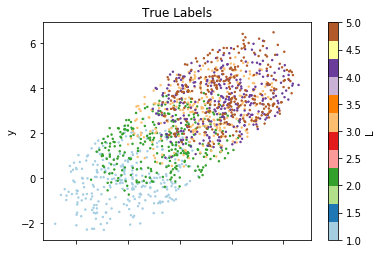

In [2]:
df = pd.read_csv('data/a4q4.csv', index_col=0)

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

# plot any 2 of the 6 features, using the given label
df.plot.scatter(x='x', y='y', c='L',colormap=cmapstr,s=ptsize, title='True Labels')

plt.show()

### 1. Produce a scatter plot of any 2 dimensions. 

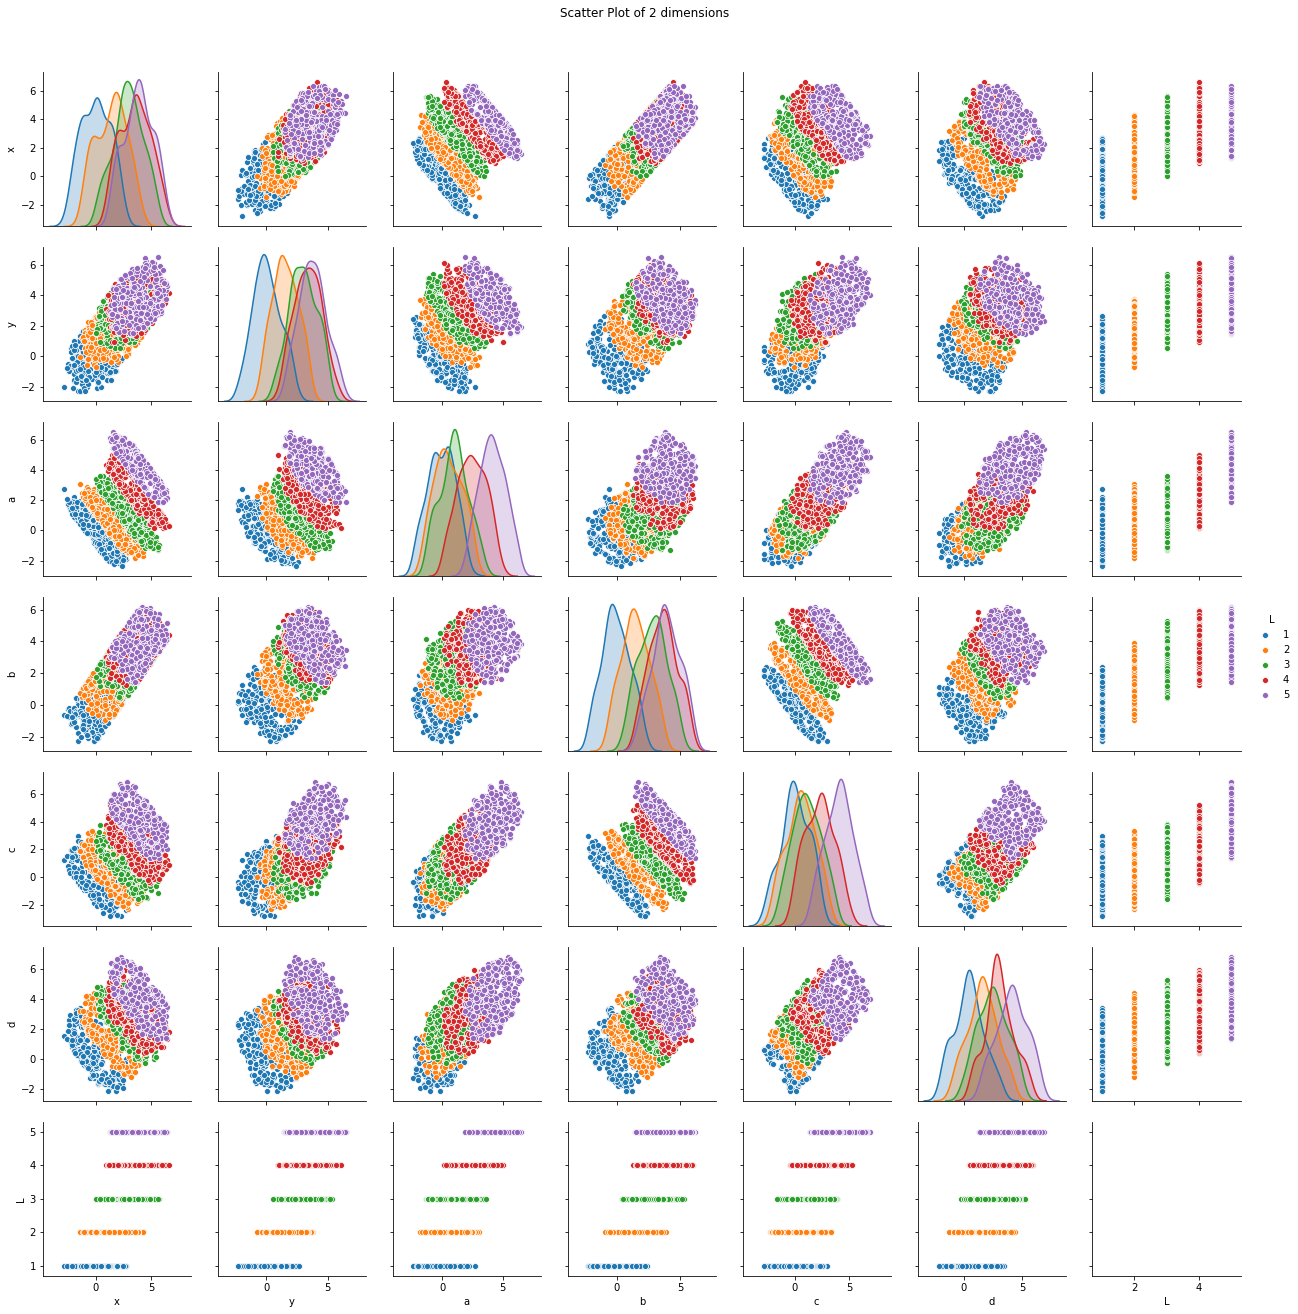

In [6]:
import seaborn as sns

plot = sns.pairplot(df, hue="L")

plot.fig.suptitle('Scatter Plot of 2 dimensions', y=1.04)

plot

Do you see any natural clusters in 2D?

> Yes, some features are separable in the plots. Here is the list:
* ```x``` and ```a```
* ```b``` and ```c```

### 2. Build a classifier (your choice, e.g., Naive Bayes, KNN, etc) using the 6 features and the label.  Get an estimate of the classifier performance using cross validation.

> I choose *Naive Bayes* classifier for this purpose because we have thoroughly investigated the application of NB on the Iris dataset. The following function implements a *Gaussian Naive Bayes* classifier and calculated 10-fold cross-validation on the given dataset.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

KFOLDS = 10

def nb_classifier(data_in, label_in):
    """
    :purpose: This function creates an NB classifier and calculates 
    its cross validated accuracy
    :param data_in: dataset
    :param label_in: true answers for the dataset
    :return: the accuracy of the model with 5 point accuracy
    """
    clf_nb = GaussianNB()
    
    # fitting the model to the data
    clf_nb.fit(data_in, label_in) 
    
    result = cross_val_score(clf_nb, data_in, 
                    label_in, 
                    cv=KFOLDS, 
                    scoring='accuracy')
    
    return round(result.mean(),5)

In [11]:
labels = df.values[:, 6]
data = df.values[:, :6]
    
result = nb_classifier(data, labels)

print('Naive Bayes accuracy using all features:', result)

Naive Bayes accuracy using all features: 0.91533


### 3. Use Principle Component Analysis to reduce the data to 2 principle components.  (look at the docs: sklearn.decomposition.PCA)

In [13]:
from sklearn.decomposition import PCA

data = df.values[:, :6]

# PCA
pca = PCA(n_components=2)
pca.fit(data)
data = pca.transform(data)

# Convert to Dataframe
pca_data = pd.DataFrame(data= data, 
                        columns= ['Component1', 'Component2'])
pca_data['L'] = df.values[:, 6]
pca_data

,Component1,Component2,L
0,4.620505,-1.270596,1.0
1,4.887661,0.586271,1.0
2,4.570505,-1.464535,1.0
3,4.933026,-1.594514,1.0
4,4.563424,-3.746621,1.0
...,...,...,...
1495,-4.696963,-4.116303,5.0
1496,-4.950297,-2.309152,5.0
1497,-4.479358,-1.594562,5.0
1498,-4.828170,1.153164,5.0


### 4. Produce a scatter plot of the 2 principle components.  Do you see any natural clusters?

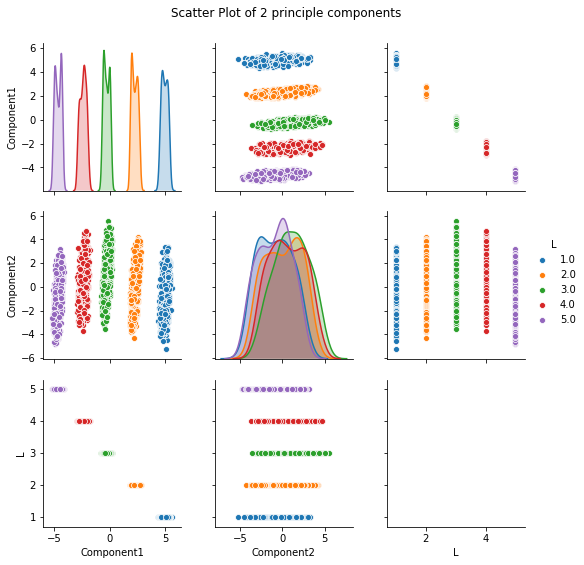

In [15]:
plot = sns.pairplot(pca_data, hue="L")

plot.fig.suptitle('Scatter Plot of 2 principle components', y=1.04)

plot

### 5. Build a classifier (the same type you used above) using the 2 principle components and the label.  Get an estimate of the classifier performance using cross validation.

In [18]:
labels = pca_data.values[:, 2]
data = pca_data.values[:, :2]
    
result = nb_classifier(data, labels)

print('Naive Bayes accuracy using principle components:', result)

Naive Bayes accuracy using principle components: 1.0


### 6. Report on the difference in classifier accuracy.

> My classifier obtains an accuracy of 1.0 using principle components and an accuracy of 0.91  using the original dataset.

> The scatter plot of principle components shows distinctive clusters compared to the scatter plot of all features with overlapping clusters. That's why *Naive Bayes* obtain better classification accuracy using principle components compared to the original dataset.

## Grading
1. 3 marks: You built a classifier using the whole dataset, and reported an accuracy value.
1. 3 marks: You applied PCA, and visualized the first two principle components.
1. 3 marks: You built a classifier using the first two principle components, and reported an accuracy value.
1. 3 marks: You reported on the difference in accuracy between your two classifiers.